In [ ]:
#|default_exp datasets

In [ ]:
#|export
from __future__ import annotations
import math,numpy as np,matplotlib.pyplot as plt
from operator import itemgetter
from itertools import zip_longest
import fastcore.all as fc
from torch.utils.data import default_collate,DataLoader
from miniai.training import *
import torchvision.transforms.functional as TF

In [ ]:
from datasets import load_dataset
import torch

%matplotlib inline

### Hugging Face dataset

In [ ]:
name = 'fashion_mnist'

In [ ]:
#|export
def inplace(f):
    def _f(b):
        f(b)
        return b
    return _f

In [ ]:
rds = load_dataset(name)

Found cached dataset fashion_mnist (/Users/arun/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/0a671f063342996f19779d38c0ab4abef9c64f757b35af8134b331c294d7ba48)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
x,y = rds['train'].features

In [ ]:
@inplace
def transformi(b):
    b[x] = [torch.flatten(TF.to_tensor(ele)) for ele in b[x]]

In [ ]:
tds = rds.with_transform(transformi)

In [ ]:
#|export
def collated_dict(ds):
    get = itemgetter(*ds.features)
    def _f(b):
        return get(default_collate(b))
    return _f

In [ ]:
dlf = DataLoader(tds['train'], batch_size=10, collate_fn=collated_dict(tds['train']))

### Plotting images

In [ ]:
#|export
@fc.delegates(plt.Axes.imshow)
def show_image(im, ax=None, title=None, figsize=None, noframe=True, **kwargs):
    if fc.hasattrs(im, ('cpu', 'permute', 'detach')):
        im = im.detach().cpu()
        if len(im.shape)==3 and im.shape[0] < 5:
            im = im.permute(1,2,0)
    elif not isinstance(im, np.ndarray):
        im = np.array(im)
    if im.shape[-1] == 1:
        im = im[..., 0]
    if ax is None:
        _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])
    if noframe:
        ax.axis('off')
    if title is not None:
        ax.set_title(title)
    return ax

In [ ]:
xb,yb = next(iter(dlf))
xb.shape,yb.shape

(torch.Size([10, 784]), torch.Size([10]))

In [ ]:
im = xb[0].view(1, 28, 28)
if len(im.shape)==3 and im.shape[0] < 5:
    im = im.permute(1,2,0)
im.shape

torch.Size([28, 28, 1])

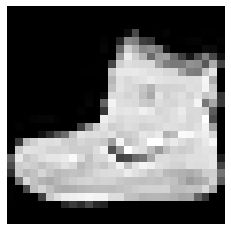

In [ ]:
show_image(im, cmap='gray');

In [ ]:
#|export
@fc.delegates(plt.subplots, keep=True)
def subplots( nrows:int=1, # Number of rows in returned axes grid
    ncols:int=1, # Number of columns in returned axes grid
    figsize:tuple=None, # Width, height in inches of the returned figure
    imsize:int=3, # Size (in inches) of images that will be displayed in the returned figure
    suptitle:str=None, # Title to be set to returned figure cool
    **kwargs):
    if figsize is None:
        figsize = (nrows*imsize, ncols*imsize)
    fig,ax = plt.subplots(nrows, ncols, figsize=figsize, **kwargs)
    if suptitle is not None:
        fig.suptitle(suptitle)
    if nrows*ncols == 1:
        ax = np.array([ax])
    return fig, ax

In [ ]:
from nbdev.showdoc import show_doc

In [ ]:
show_doc(subplots)

---

### subplots

>      subplots (nrows:int=1, ncols:int=1, figsize:tuple=None, imsize:int=3,
>                suptitle:str=None, sharex=False, sharey=False, squeeze=True,
>                width_ratios=None, height_ratios=None, subplot_kw=None,
>                gridspec_kw=None, **kwargs)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| nrows | int | 1 | Number of rows in returned axes grid |
| ncols | int | 1 | Number of columns in returned axes grid |
| figsize | tuple | None | Width, height in inches of the returned figure |
| imsize | int | 3 | Size (in inches) of images that will be displayed in the returned figure |
| suptitle | str | None | Title to be set to returned figure cool |
| sharex | bool | False |  |
| sharey | bool | False |  |
| squeeze | bool | True |  |
| width_ratios | NoneType | None |  |
| height_ratios | NoneType | None |  |
| subplot_kw | NoneType | None |  |
| gridspec_kw | NoneType | None |  |
| kwargs |  |  |  |

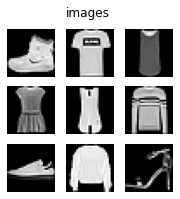

In [ ]:
fig,ax = subplots(3,3, imsize=1, suptitle='images')
imgs = xb[:9]
for ax,im in zip(ax.flat, imgs):
    show_image(im.view(28,28), ax=ax, cmap='gray');

In [ ]:
def get_grid(n, nrows=None, ncols=None, title=None, weight=None, size=14, **kwargs):
    if nrows:
        ncols = ncols or int(np.floor(n/nrows))
    elif ncols:
        nrows = nrows or int(np.ceil(n/ncols))
    else:
        nrows = int(math.sqrt(n))
        ncols = int(np.floor(n/nrows))
    
    print('nrows:', nrows)
    print('ncols:', ncols)
    fig,ax = subplots(nrows, ncols, **kwargs)
    for i in range(n, nrows*ncols):
        ax.flat[i].set_axis_off()
    if title is not None:
        fig.suptitle(title, weight=weight, size=size)
    return fig,ax

In [ ]:
#|export
@fc.delegates(subplots)
def get_grid(n, nrows=None, ncols=None, title=None, weight=None, size=14, **kwargs):
    if nrows:
        ncols = ncols or int(np.floor(n/nrows))
    elif ncols:
        nrows = nrows or int(np.ceil(n/ncols))
    else:
        nrows = int(math.sqrt(n))
        ncols = int(np.floor(n/nrows))
    fig,axs = subplots(nrows,ncols,**kwargs)
    for i in range(len(axs.flat)):
        axs.flat[i].set_axis_off()
    if title is not None:
        fig.suptitle(title, weight=weight, size=size)
    return fig,axs

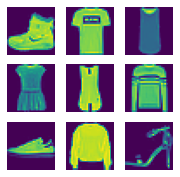

In [ ]:
fig,axs = get_grid(9,imsize=1)
for im,ax in zip(imgs, axs.flat):
    show_image(im.view(28, 28), ax=ax)

In [ ]:
#|export
@fc.delegates(subplots)
def show_images(imgs, nrows=None, ncols=None, titles=None, **kwargs):
    axs = get_grid(len(imgs), nrows=nrows, ncols=ncols, **kwargs)[1]
    for img,t,ax in zip_longest(imgs, titles or [], axs.flat):
        show_image(img.view(28, 28), ax=ax, title=t)

In [ ]:
lbls = yb[:9]
lbls = [str(ele) for ele in list(lbls)]

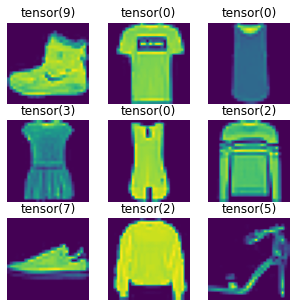

In [ ]:
show_images(imgs, imsize=1.7, titles=list(lbls))

In [ ]:
#|export
class DataLoaders:
    def __init__(self, *dls):
        self.train,self.valid = dls[:2]
    
    @classmethod
    def from_dd(cls, dd, batch_size, as_tuple=True, **kwargs):
        f = collated_dict(dd['train'])
        return cls(*get_dls(*dd.values(), bs=batch_size, collate_fn=f, **kwargs))

In [ ]:
dls = DataLoaders.from_dd(tds, 4)

In [ ]:
xb,yb = next(iter(dls.train))
xb_v,yb_v = next(iter(dls.valid))

In [ ]:
xb.shape,yb.shape,xb_v.shape,yb_v.shape

(torch.Size([4, 784]), torch.Size([4]), torch.Size([8, 784]), torch.Size([8]))

In [ ]:
import nbdev;
nbdev.nbdev_export()